In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
img = cv2.imread('gambarbaru.jpg')

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

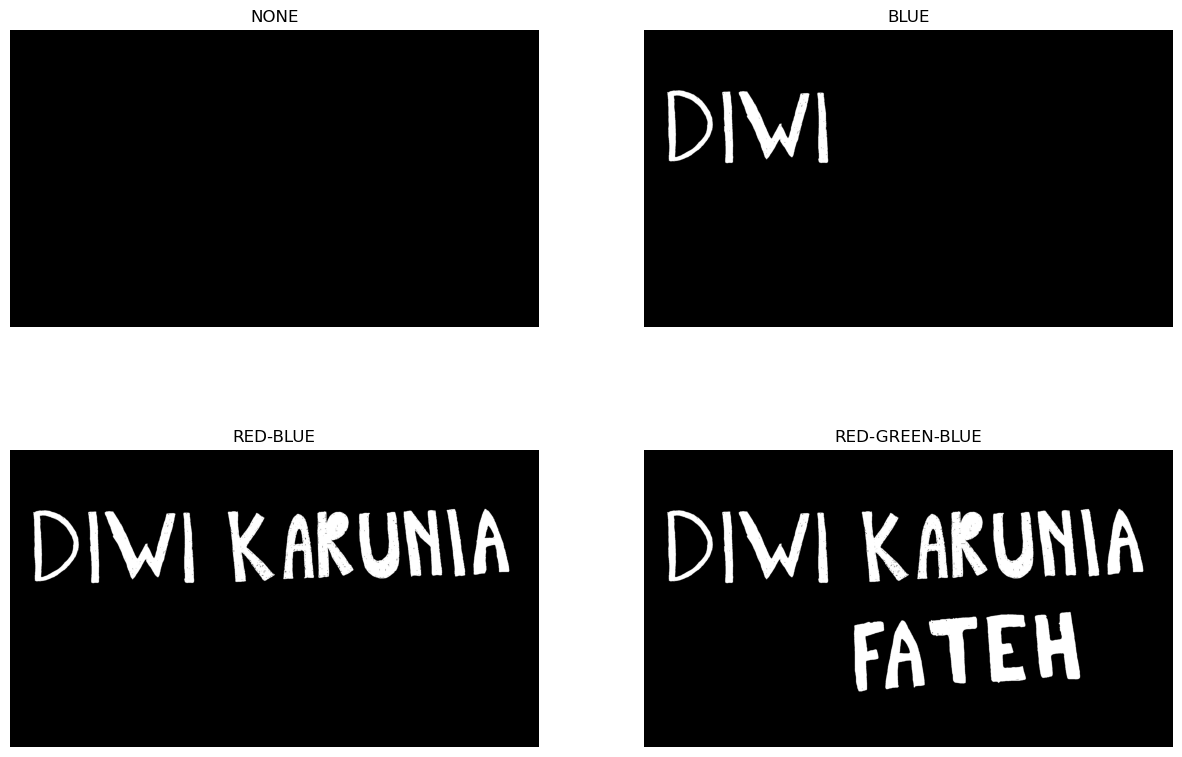

In [11]:
def get_mask(hsv_img, lower, upper):
    mask = cv2.inRange(hsv_img, lower, upper)
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    return mask

blue = get_mask(hsv, np.array([100, 150, 0]), np.array([140, 255, 255]))
red1 = get_mask(hsv, np.array([0, 100, 50]), np.array([10, 255, 255]))
red2 = get_mask(hsv, np.array([170, 100, 50]), np.array([180, 255, 255]))
red = cv2.bitwise_or(red1, red2)
green = get_mask(hsv, np.array([35, 40, 40]), np.array([85, 255, 255]))

def apply_mask(mask):
    result = np.zeros_like(img)
    result[mask > 0] = [255, 255, 255]
    return result

none_img = np.zeros_like(img)
blue_img = apply_mask(blue)
red_blue_img = apply_mask(cv2.bitwise_or(red, blue))
all_colors_img = apply_mask(cv2.bitwise_or(cv2.bitwise_or(red, green), blue))

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].imshow(cv2.cvtColor(none_img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("NONE")
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title("BLUE")
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.cvtColor(red_blue_img, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("RED-BLUE")
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(all_colors_img, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title("RED-GREEN-BLUE")
axs[1, 1].axis('off')

plt.show()
